In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [15]:
con_ssh1 = xr.open_dataset("/mnt/e/CMIP5_ForM_noTauu/OBS/zos1/Con_SSH.nc")[
    'ssh'].loc["1980-01":"2019-12"].rolling(time=3,center=True).mean()[1:-1]
hadisst = xr.open_dataset("/mnt/e/CMIP5_ForM_noTauu/OBS/tos1/HadISST_sst_2x2.nc")[
    'sst'].loc["1980-01":"2019-12"].rolling(time=3,center=True).mean()[1:-1]
nino34 = xr.open_dataset("/mnt/e/CMIP5_ForM_noTauu/OBS/nino341/HadISST_sst_2x2.nc")[
    'sst'].loc["1980-01":"2019-12", 0,0].rolling(time=3,center=True).mean()[1:-1]

In [16]:
nino34DJF = nino34.groupby("time.month")[1]

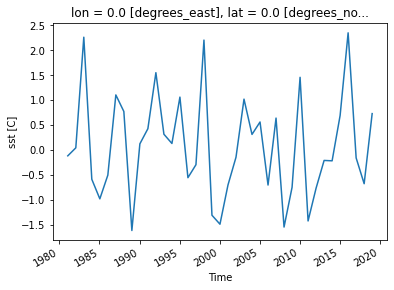

In [17]:
nino34DJF.plot()

In [18]:
nino34DJF.loc["1998"]

<xarray.DataArray 'sst' (time: 1)>
array([2.2048888], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-16T12:00:00
    lon      float64 0.0
    lat      float64 0.0
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

In [19]:
var_ssh = np.array(con_ssh1.loc["1996-10":"1996-12"].fillna(0))
var_sst = np.array(hadisst.loc["1996-10":"1996-12"].fillna(0))
var_nino = np.array(nino34.loc["1997-12":"1998-02"].fillna(0))
np.save("../data/htmp_data/98sst",var_sst)
np.save("../data/htmp_data/98ssh",var_ssh)
np.save("../data/htmp_data/98nino34",var_nino)
var_ssh.shape,var_nino.shape,var_sst.shape

((3, 24, 72), (3,), (3, 24, 72))